In [248]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import openmatrix as omx
%matplotlib inline

In [102]:
mazs = pd.read_csv('data/mazs_xborder.csv')
maz_to_pmsa = mazs[['MAZ','pseudomsa']].set_index('MAZ').pseudomsa
maz_to_taz = mazs[['MAZ','TAZ']].set_index('MAZ').TAZ
ext_maz_to_maz = mazs[['MAZ','original_MAZ']].set_index('MAZ').original_MAZ

In [39]:
mazs[mazs['external_TAZ'] > 0]

,MAZ,TAZ,hs,hs_sf,hs_mf,hs_mh,hh,hh_sf,hh_mf,hh_mh,...,ped_wait_22,ped_wait_24,ped_wait_26,ped_wait_28,ped_wait_30,ped_wait_32,ped_wait_34,ped_wait_36,ped_wait_38,ped_wait_40
7065,7066,4989,0,0,0,0,0,0,0,0,...,7.7,7.3,7.0,7.1,6.2,3.9,1.6,2.1,3.9,1.7
7089,7090,4993,0,0,0,0,0,0,0,0,...,37.7,30.7,28.6,24.5,23.3,16.4,10.0,7.0,2.3,1.7
21894,21895,4831,0,0,0,0,0,0,0,0,...,1.8,1.6,1.3,1.1,1.2,0.9,0.9,0.8,3.0,999.0


### presampling alts 

In [151]:
presamp_alts = pd.read_csv('output/trace.tour_od_choice.sample.work.presample.interaction_sample.chunk_1.alternatives.csv')
presamp_alts['pseudomsa'] = presamp_alts['orig_MAZ'].map(maz_to_pmsa)

In [180]:
presamp_alts

,orig_MAZ_dest_TAZ,dest_TAZ,size_term,orig_MAZ,poe_id,colonia_pop_accessibility,original_MAZ,external_TAZ,external_MAZ,orig_TAZ,pseudomsa
0,7066_13,13,165.406,7066,1,12.773032,-1,2,23004,4989,4
1,7090_13,13,165.406,7090,0,12.926537,-1,1,23003,4993,4
2,21895_13,13,165.406,21895,2,11.124192,-1,4,23005,4831,8
3,7066_14,14,45.822,7066,1,12.773032,-1,2,23004,4989,4
4,7090_14,14,45.822,7090,0,12.926537,-1,1,23003,4993,4
...,...,...,...,...,...,...,...,...,...,...,...
13669,7090_4995,4995,1013.420,7090,0,12.926537,-1,1,23003,4993,4
13670,21895_4995,4995,1013.420,21895,2,11.124192,-1,4,23005,4831,8
13671,7066_4996,4996,73.000,7066,1,12.773032,-1,2,23004,4989,4
13672,7090_4996,4996,73.000,7090,0,12.926537,-1,1,23003,4993,4


<AxesSubplot:xlabel='pseudo-MSA', ylabel='proportion'>

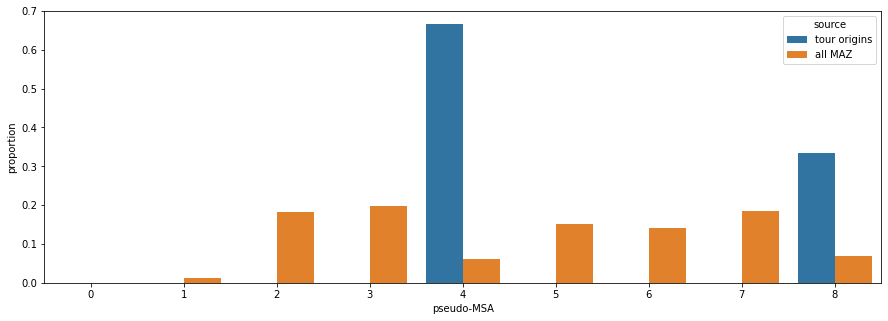

In [152]:
fig, ax = plt.subplots(figsize=(15,5))
presampled_alts_pct = presamp_alts['pseudomsa'].value_counts() / len(presamp_alts)
presampled_alts_pct = presampled_alts_pct.reset_index()
presampled_alts_pct.columns = ['pseudo-MSA', 'proportion']
presampled_alts_pct['source'] = 'tour origins'
all_maz_pct = mazs['pseudomsa'].value_counts() / len(mazs)
all_maz_pct = all_maz_pct.reset_index()
all_maz_pct.columns = ['pseudo-MSA', 'proportion']
all_maz_pct['source'] = 'all MAZ'
maz_pct = pd.concat((presampled_alts_pct, all_maz_pct))
sns.barplot(data=maz_pct, x='pseudo-MSA', y='proportion', hue='source',ax=ax)

In [206]:
presamp_eval = pd.read_csv(
    'output/trace.tour_od_choice.sample.work.presample.interaction_sample.chunk_1.eval.household_id.15.csv',
    index_col=0, header=None).T
presamp_eval['total utility'] = presamp_eval['total utility'].astype(float)

for col in ['orig_MAZ','orig_TAZ', 'dest_TAZ','external_TAZ']:
    presamp_eval[col] = presamp_eval[col].astype(int)
presamp_eval['pseudomsa'] = presamp_eval['orig_MAZ'].map(maz_to_pmsa)

<AxesSubplot:xlabel='total utility', ylabel='Density'>

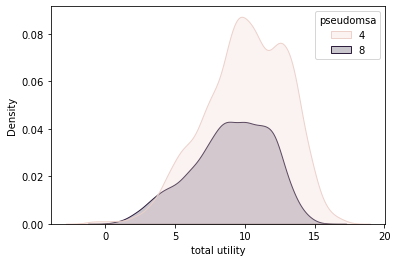

In [154]:
sns.kdeplot(data=presamp_eval, x='total utility', hue='pseudomsa', fill=True)

<AxesSubplot:xlabel='total utility', ylabel='Density'>

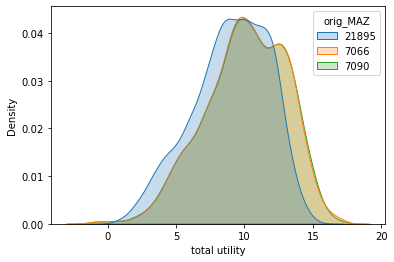

In [155]:
sns.kdeplot(data=presamp_eval, x='total utility', hue='orig_MAZ', fill=True)

In [207]:
presamp_eval.loc[presamp_eval['orig_TAZ'] == presamp_eval['dest_TAZ'],["orig_MAZ","orig_TAZ","dest_TAZ","_DIST@skims[('SOV_NT_M_DIST','MD')]"]]

,orig_MAZ,orig_TAZ,dest_TAZ,"_DIST@skims[('SOV_NT_M_DIST','MD')]"
3911,21895,4831,4831,0.6252217292785645
8606,7066,4989,4989,0.15224646031856537
13169,7090,4993,4993,0.1870305836200714


In [208]:
presamp_dest_maz = pd.read_csv(
    'output/trace.tour_od_choice.sample.work.presample.choose_MAZ_for_TAZ.taz_choices.csv'
)

In [209]:
presamp_eval = pd.merge(presamp_eval, presamp_dest_maz, on=['dest_TAZ','orig_MAZ'])

### Logsums

In [157]:
logsum_choosers = pd.read_csv(
    'output/trace.tour_od_choice.logsums.work.compute_logsums.simple_simulate_logsums.chunk_2.eval_nl_logsums.choosers.csv',
    index_col=0
).transpose()
logsum_choosers['destination'] = logsum_choosers['destination'].astype(int)

#### origins

<AxesSubplot:xlabel='origin', ylabel='count'>

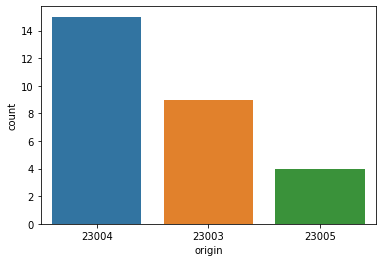

In [158]:
sns.countplot(data=logsum_choosers, x='origin')

#### destination pMSA's 

In [159]:
logsum_choosers['pseudomsa'] = logsum_choosers['destination'].map(maz_to_pmsa)

No pMSA 4 tour destinations!

<AxesSubplot:xlabel='pseudomsa', ylabel='count'>

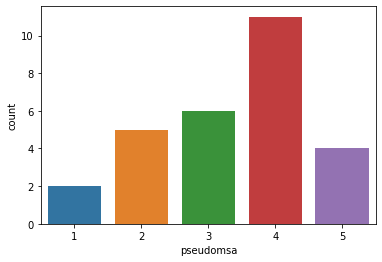

In [160]:
sns.countplot(data=logsum_choosers, x='pseudomsa')

In [161]:
for col in ['logsum_DRIVEALONE_outbound', 'logsum_DRIVEALONE_inbound',
       'logsum_SHARED2_outbound', 'logsum_SHARED2_inbound',
       'logsum_SHARED3_outbound', 'logsum_SHARED3_inbound',
       'logsum_WALK_outbound', 'logsum_WALK_inbound']:
    logsum_choosers[col] = logsum_choosers[col].astype(float)

In [162]:
mean_pmsa_logsums_by_tour_mode = logsum_choosers.groupby(['origin','pseudomsa']).mean()
mean_pmsa_logsums_by_tour_mode = mean_pmsa_logsums_by_tour_mode[[col for col in mean_pmsa_logsums_by_tour_mode.columns if col not in ['destination','MAZ']]]

In [163]:
mean_pmsa_logsums_by_tour_mode = mean_pmsa_logsums_by_tour_mode.reset_index().melt(
    id_vars=['origin','pseudomsa'], var_name='mode',value_name='logsum')

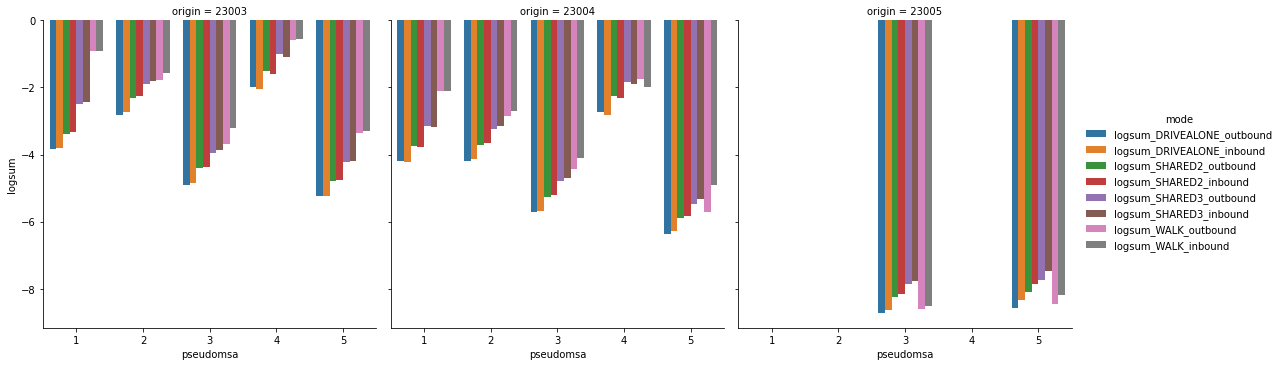

In [164]:
sns.catplot(data=mean_pmsa_logsums_by_tour_mode, x='pseudomsa',y='logsum',hue='mode',col='origin', kind='bar')

In [165]:
sampled_alts = pd.read_csv('output/trace.tour_od_choice.sample.work.presample.choose_MAZ_for_TAZ.taz_choices.csv')

In [166]:
sampled_alts = pd.merge(sampled_alts, mazs[['MAZ', 'pseudomsa']], left_on='dest_MAZ',right_on='MAZ')

<AxesSubplot:xlabel='pseudo-MSA', ylabel='proportion'>

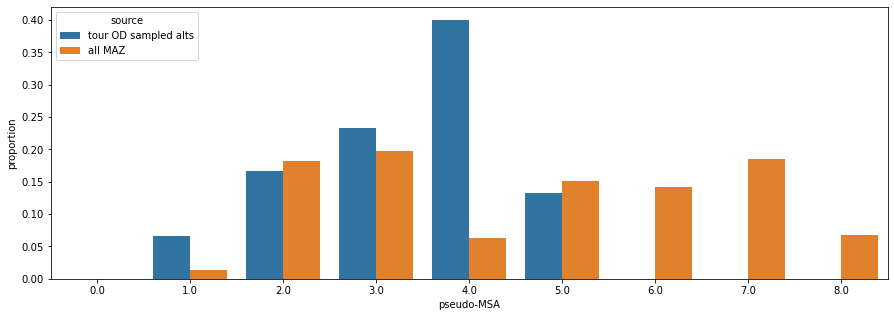

In [167]:
fig, ax = plt.subplots(figsize=(15,5))
sampled_alts_pct = sampled_alts['pseudomsa'].value_counts().reset_index()/len(sampled_alts)
sampled_alts_pct.columns = ['pseudo-MSA', 'proportion']
sampled_alts_pct['pseudo-MSA'] = sampled_alts_pct['pseudo-MSA'] * len(sampled_alts)
sampled_alts_pct['source'] = 'tour OD sampled alts'
all_maz_pct = mazs['pseudomsa'].value_counts().reset_index() / len(mazs)
all_maz_pct.columns = ['pseudo-MSA', 'proportion']
all_maz_pct['pseudo-MSA'] = all_maz_pct['pseudo-MSA'] * len(mazs)
all_maz_pct['source'] = 'all MAZ'
maz_pct = pd.concat((sampled_alts_pct, all_maz_pct))
sns.barplot(data=maz_pct, x='pseudo-MSA', y='proportion',hue='source',ax=ax)

In [17]:
taz_size_terms = presamp_alts[['dest_TAZ','size_term']].drop_duplicates()

In [18]:
taz_size_terms

,dest_TAZ,size_term
0,13,165.406
3,14,45.822
6,15,7458.031
9,16,748.143
12,17,8.951
...,...,...
13770,4992,329.059
13773,4993,736.096
13776,4994,67.366
13779,4995,1013.420


<AxesSubplot:xlabel='pseudomsa'>

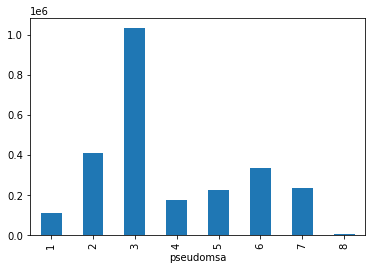

In [19]:
presamp_alts.groupby('pseudomsa')['size_term'].sum().plot(kind='bar')

<AxesSubplot:xlabel='pseudomsa'>

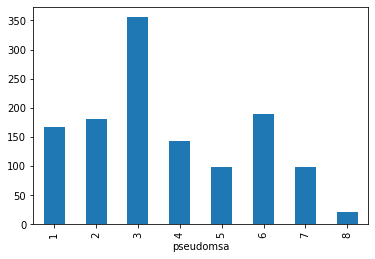

In [20]:
presamp_alts.groupby('pseudomsa')['size_term'].mean().plot(kind='bar')

### Simulation 

In [168]:
simulate_eval = pd.read_csv(
    'output/trace.tour_od_choice.simulate.work.interaction_sample_simulate.chunk_1.eval.household_id.15.csv',
    index_col=0, header=None).T

In [169]:
simulate_eval['original_MAZ'] = simulate_eval['origin'].astype(int).map(ext_maz_to_maz)
simulate_eval['pseudomsa'] = simulate_eval['original_MAZ'].map(maz_to_pmsa)

<AxesSubplot:xlabel='pseudo-MSA', ylabel='proportion'>

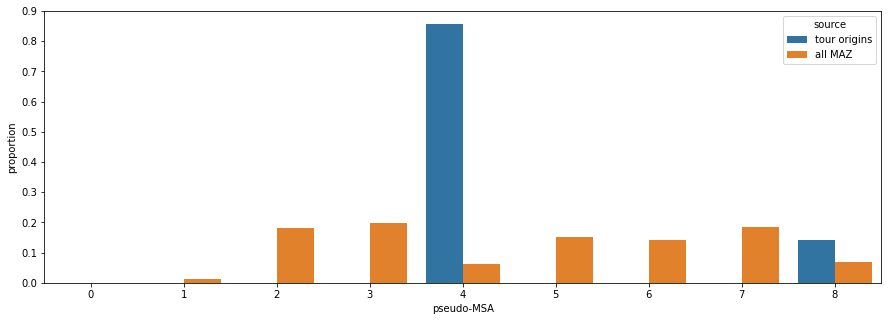

In [170]:
fig, ax = plt.subplots(figsize=(15,5))
simulated_alts_pct = simulate_eval['pseudomsa'].value_counts() / len(simulate_eval)
simulated_alts_pct = simulated_alts_pct.reset_index()
simulated_alts_pct.columns = ['pseudo-MSA', 'proportion']
simulated_alts_pct['source'] = 'tour origins'
all_maz_pct = mazs['pseudomsa'].value_counts() / len(mazs)
all_maz_pct = all_maz_pct.reset_index()
all_maz_pct.columns = ['pseudo-MSA', 'proportion']
all_maz_pct['source'] = 'all MAZ'
maz_pct = pd.concat((simulated_alts_pct, all_maz_pct))
sns.barplot(data=maz_pct, x='pseudo-MSA', y='proportion', hue='source',ax=ax)

### Compare sampling vs. simulation distances

In [224]:
skims_am = omx.open_file('data/traffic_skims_xborder_AM.omx')
skims_md = omx.open_file('data/traffic_skims_xborder_MD.omx')

In [210]:
simulate_eval['orig_TAZ'] = simulate_eval['origin'].astype(int).map(maz_to_taz)
simulate_eval['dest_TAZ'] = simulate_eval['destination'].astype(int).map(maz_to_taz)

In [240]:
simulate_eval.rename(columns={'origin':'orig_MAZ', 'destination':'dest_MAZ',"_DIST@skims[('SOV_NT_M_DIST','AM')]":'sov_dist'}, inplace=True)

In [242]:
presamp_eval.rename(columns={"_DIST@skims[('SOV_NT_M_DIST','MD')]":'sov_dist'}, inplace=True)

In [243]:
merged = pd.merge(presamp_eval,simulate_eval, 
                   left_on=['dest_TAZ','external_TAZ'],right_on=['dest_TAZ','orig_TAZ'],
                  suffixes=('_samp','_sim'))

In [244]:
merged = merged[[
    'orig_MAZ_samp','orig_MAZ_sim','orig_TAZ_samp','external_TAZ_samp','orig_TAZ_sim',
    'dest_MAZ_samp','dest_MAZ_sim','dest_TAZ',
    'sov_dist_samp','sov_dist_sim']]

In [260]:
merged.head()

,orig_MAZ_samp,orig_MAZ_sim,orig_TAZ_samp,external_TAZ_samp,orig_TAZ_sim,dest_MAZ_samp,dest_MAZ_sim,dest_TAZ,sov_dist_samp,sov_dist_sim,sov_dist_md_int_TAZ,sov_dist_md_ext_TAZ
0,21895,23005,4831,4,4,11244,11244,1980,41.69432067871094,41.963584899902344,41.694321,41.963585
1,21895,23005,4831,4,4,5599,5599,2512,44.85908126831055,46.13188171386719,44.859081,45.128345
2,21895,23005,4831,4,4,5599,5599,2512,44.85908126831055,46.13188171386719,44.859081,45.128345
3,21895,23005,4831,4,4,6738,6738,2746,33.604190826416016,33.87345504760742,33.604191,33.873455
4,21895,23005,4831,4,4,9414,9414,3577,32.06199645996094,32.331260681152344,32.061996,32.331261


In [245]:
merged['sov_dist_md_int_TAZ'] = skims_md['SOV_NT_M_DIST__MD'][merged['orig_TAZ_samp'].values - 1, merged['dest_TAZ'].values - 1]
merged['sov_dist_md_ext_TAZ'] = skims_md['SOV_NT_M_DIST__MD'][merged['external_TAZ_samp'].values - 1, merged['dest_TAZ'].values - 1]
merged['sov_dist_am_ext_TAZ'] = skims_am['SOV_NT_M_DIST__AM'][merged['orig_TAZ_sim'].values - 1, merged['dest_TAZ'].values - 1]

Sampling distances should match internal TAZ distances (the CTRAMP "bug") and not external TAZ distances

In [258]:
assert np.allclose(merged['sov_dist_samp'].astype(float), merged['sov_dist_md_int_TAZ'].astype('float'))

In [259]:
assert not np.allclose(merged['sov_dist_samp'].astype(float), merged['sov_dist_md_ext_TAZ'].astype('float'))

But simulation distances should match external TAZ distances rather than internal TAZ distances

In [264]:
assert np.allclose(merged['sov_dist_sim'].astype(float), merged['sov_dist_am_ext_TAZ'].astype('float'))

In [265]:
assert not np.allclose(merged['sov_dist_sim'].astype(float), merged['sov_dist_md_int_TAZ'].astype('float'))

In [246]:
merged[['orig_TAZ_samp','external_TAZ_samp','dest_TAZ','sov_dist_samp','sov_dist_md_int_TAZ','sov_dist_sim','sov_dist_md_ext_TAZ']]

,orig_TAZ_samp,external_TAZ_samp,dest_TAZ,sov_dist_samp,sov_dist_md_int_TAZ,sov_dist_sim,sov_dist_md_ext_TAZ
0,4831,4,1980,41.69432067871094,41.694321,41.963584899902344,41.963585
1,4831,4,2512,44.85908126831055,44.859081,46.13188171386719,45.128345
2,4831,4,2512,44.85908126831055,44.859081,46.13188171386719,45.128345
3,4831,4,2746,33.604190826416016,33.604191,33.87345504760742,33.873455
4,4831,4,3577,32.06199645996094,32.061996,32.331260681152344,32.331261
5,4989,2,2512,27.756315231323242,27.756315,28.827980041503906,28.827980
6,4989,2,2620,29.19895362854004,29.198954,30.270618438720703,30.270618
7,4989,2,2639,26.82597541809082,26.825975,27.897640228271484,27.897640
8,4989,2,3169,26.707792282104492,26.707792,27.779457092285156,27.779457
9,4989,2,3383,21.85386848449707,21.853868,22.925533294677734,22.925533


In [236]:
skims_md['SOV_NT_M_DIST__MD'][4993-1][4993-1]

0.1870305836200714

In [237]:
skims_md['SOV_NT_M_DIST__MD'][1-1][4993-1]

1.5756943225860596

In [238]:
skims_md['SOV_NT_M_DIST__MD'][4993-1][4773-1]

6.411491870880127

In [239]:
skims_md['SOV_NT_M_DIST__MD'][1-1][4773-1]

7.643658638000488